In [1]:
import pandas as pd

filmes = pd.read_csv('./ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,genero
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv('./ml-latest-small/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'timestamp']
notas.head()

,usuarioId,filmeId,nota,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.describe()

,usuarioId,filmeId,nota,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Primeira tentativa de recomendação: heurística total de votos

In [3]:
total_votos = notas['filmeId'].value_counts()
total_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [4]:
filmes.loc[318]

titulo    Shawshank Redemption, The (1994)
genero                         Crime|Drama
Name: 318, dtype: object

In [5]:
filmes['totalVotos'] = total_votos
filmes.head()

,titulo,genero,totalVotos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [7]:
filmes.sort_values('totalVotos', ascending = False).head(10)

,titulo,genero,totalVotos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [6]:
notas_medias = notas.groupby('filmeId').mean()['nota']
notas_medias.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [7]:
filmes['notaMedia'] = notas_medias
filmes.sort_values('totalVotos', ascending = False).head(10)

,titulo,genero,totalVotos,notaMedia
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


# Uma segunda heurística: nota média e filtrando votos

In [8]:
filmes.sort_values('notaMedia', ascending = False).head(10)

,titulo,genero,totalVotos,notaMedia
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [11]:
filmes.query('totalVotos >= 10').sort_values('notaMedia', ascending = False).head(10)

,titulo,genero,totalVotos,notaMedia
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [9]:
filmes_com_mais_50_votos = filmes.query('totalVotos >= 30')
filmes_com_mais_50_votos.sort_values('notaMedia', ascending = False).head(10)

,titulo,genero,totalVotos,notaMedia
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
1204,Lawrence of Arabia (1962),Adventure|Drama|War,45.0,4.300000
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336


# Recomendação por similaridade

In [13]:
filmes_assistido = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[filmes_assistido]

,titulo,genero,totalVotos,notaMedia
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [14]:
filmes_com_mais_50_votos.drop(
    filmes_assistido, errors='ignore'
    ).query(
    'genero == "Adventure|Children|Fantasy"'
    ).sort_values(
    'notaMedia',ascending = False
    ).head(10)

,titulo,genero,totalVotos,notaMedia
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43.0,3.581395
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
60,"Indian in the Cupboard, The (1995)",Adventure|Children|Fantasy,34.0,3.235294


# Collaborative filtering x Content based filtering

# Procurar usuários "similares"
- João deu nota 4 no filme toy story
- Maria deu nota 5 no filme toy story
- Paulo deu nota 3 no filme toy story
- Joana deu nota 3.5 no filme toy story

x - y => distância

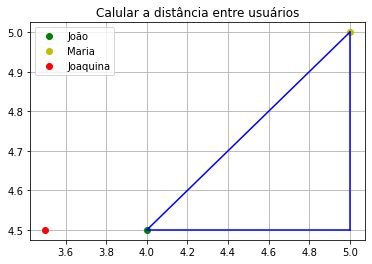

In [10]:
# João = [4, 4.5]
# Maria = [5, 5]
# Joaquina = [3.5, 4.5]
import matplotlib.pyplot as plt

plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.plot(3.5, 4.5, 'ro')
plt.grid(linestyle = '-')
plt.legend(['João', 'Maria', 'Joaquina'])
plt.title('Calular a distância entre usuários')
plt.plot([4, 5], [4.5, 5], color='b', linestyle='-')
plt.plot([4, 5], [4.5, 4.5], color='b', linestyle='-')
plt.plot([5, 5], [4.5, 5], color='b', linestyle='-')

In [11]:
import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])
joaquina = np.array([3.5, 4.5])

joao - maria

array([-1. , -0.5])

In [12]:
import math

def distancia(a,b):
    #deltax, deltay = a - b
    #return math.sqrt(deltax * deltax + deltay * deltay)
    return np.linalg.norm(a - b)

print(distancia(joao, maria))
print(distancia(joao, joaquina))
print(distancia(maria, joaquina))

1.118033988749895
0.5
1.5811388300841898


In [13]:
def notas_do_usuario(usuarioId):
    notas_do_usuario = notas.query('usuarioId == %d' % usuarioId)[['filmeId', 'nota']].set_index('filmeId')
    return notas_do_usuario

usuario1 = notas_do_usuario(1)
usuario1.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [19]:
usuario1.loc[47]

nota    5.0
Name: 47, dtype: float64

In [15]:
usuario4 = notas_do_usuario(4)
usuario4.head()

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [16]:
diferencas = usuario1.join(usuario4, lsuffix='_u1', rsuffix='_u4').dropna()
diferencas.head(10)

,nota_u1,nota_u4
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [22]:
distancia(diferencas['nota_u1'], diferencas['nota_u4'])

11.135528725660043

# Distância entre usuários

In [17]:
def distancia_usuarios(ua, ub):
    notas_a = notas_do_usuario(ua)
    notas_b = notas_do_usuario(ub)
    dif = notas_a.join(notas_b, lsuffix='_a', rsuffix='_b').dropna()
    dist = distancia(dif['nota_a'], dif['nota_b'])
    return [ua, ub, dist]

distancia_usuarios(1, 4)

[1, 4, 11.135528725660043]

In [24]:
qtd_usuarios = len(notas['usuarioId'].unique())
print('Temos %d usuários' % qtd_usuarios)

Temos 610 usuários


In [18]:
def distancias_todos(voce_id):
    distancias = []
    for user_id in notas['usuarioId'].unique():
        informacoes = distancia_usuarios(voce_id, user_id)
        distancias.append(informacoes)
    return distancias

distancias = distancias_todos(1)

In [26]:
distancias[:5]

[[1, 1, 0.0],
 [1, 2, 1.4142135623730951],
 [1, 3, 8.200609733428363],
 [1, 4, 11.135528725660043],
 [1, 5, 3.7416573867739413]]

In [19]:
def distancias_todos(voce_id):
    distancias = [distancia_usuarios(voce_id, user_id) for user_id in notas['usuarioId'].unique()]
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
    return distancias

distancias = distancias_todos(1)

In [28]:
distancias.head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


# Usuários sem filmes em comum deve ser colocados longe

In [20]:
def distancia_usuarios(ua, ub, minimo = 3):
    notas_a = notas_do_usuario(ua)
    notas_b = notas_do_usuario(ub)
    dif = notas_a.join(notas_b, lsuffix='_a', rsuffix='_b').dropna()
    if(len(dif) < minimo):
        return [ua, ub, 10000]
    dist = distancia(dif['nota_a'], dif['nota_b'])
    return [ua, ub, dist]

In [30]:
distancias_todos(1).head(10)

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,10000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
5,1,6,8.602325
6,1,7,7.106335
7,1,8,3.741657
8,1,9,1.000000
9,1,10,7.858117


In [21]:
def mais_proximos_de(voce_id):
    distancias = distancias_todos(voce_id)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias

mais_proximos_de(1).head(10)

,voce,distancia
outra_pessoa,,
77,1,0.000000
278,1,0.500000
550,1,0.500000
511,1,0.500000
366,1,0.707107
481,1,1.000000
9,1,1.000000
258,1,1.000000
53,1,1.000000


# Parâmetros para teste

In [22]:
def distancia_usuarios(ua, ub, minimo = 3):
    notas_a = notas_do_usuario(ua)
    notas_b = notas_do_usuario(ub)
    dif = notas_a.join(notas_b, lsuffix='_a', rsuffix='_b').dropna()
    if(len(dif) < minimo):
        return None
    dist = distancia(dif['nota_a'], dif['nota_b'])
    return [ua, ub, dist]

In [23]:
def distancias_todos(voce_id, numero_de_usuarios_a_analisar = None):
    todos_usuarios = notas['usuarioId'].unique()
    if numero_de_usuarios_a_analisar:
        todos_usuarios = todos_usuarios[:numero_de_usuarios_a_analisar]
    distancias = [distancia_usuarios(voce_id, user_id) for user_id in todos_usuarios]
    distancias = list(filter(None, distancias))
    distancias = pd.DataFrame(distancias, columns = ['voce', 'outra_pessoa', 'distancia'])
    return distancias

In [24]:
def mais_proximos_de(voce_id, numero_de_usuarios_a_analisar = None):
    distancias = distancias_todos(voce_id, numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias

In [35]:
mais_proximos_de(1 , numero_de_usuarios_a_analisar = 20)

,voce,distancia
outra_pessoa,,
9,1,1.000000
13,1,1.414214
5,1,3.741657
8,1,3.741657
11,1,4.242641
17,1,4.609772
14,1,5.000000
15,1,5.852350
20,1,6.480741


In [25]:
def sugere_para(voce, numero_de_usuarios_a_analisar = None):
    notas_de_voce = notas_do_usuario(voce)

    similares = mais_proximos_de(voce , numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    similar = similares.iloc[0].name
    notas_do_similar = notas_do_usuario(similar)

    notas_do_similar = notas_do_similar.drop(notas_de_voce.index, errors = 'ignore')
    recomendacoes = notas_do_similar.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)

In [37]:
sugere_para(1, numero_de_usuarios_a_analisar = 50).head(10)

,nota,titulo,genero,totalVotos,notaMedia
filmeId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
139385,4.5,The Revenant (2015),Adventure|Drama,31.0,3.903226
168252,4.5,Logan (2017),Action|Sci-Fi,25.0,4.280000
318,4.0,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
5218,4.0,Ice Age (2002),Adventure|Animation|Children|Comedy,85.0,3.688235


In [38]:
sugere_para(1).head(10)

,nota,titulo,genero,totalVotos,notaMedia
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984
5378,5.0,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,92.0,3.157609
8961,5.0,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,125.0,3.836000
5816,5.0,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,102.0,3.598039
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277


# Sugerindo baseado em vários usuários

In [26]:
def mais_proximos_de(voce_id, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    distancias = distancias_todos(voce_id, numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id)
    return distancias.head(n_mais_proximos)

In [27]:
def sugere_para(voce, n_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    #voce = 1
    #numero_de_usuarios_a_analisar = 50
    #n_mais_proximos = 10
    notas_de_voce = notas_do_usuario(voce)

    similares = mais_proximos_de(voce , n_mais_proximos = n_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index

    notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
    notas_dos_similares = notas_dos_similares.groupby("filmeId").mean()[['nota']]

    recomendacoes = notas_dos_similares.sort_values("nota", ascending=False)
    return recomendacoes.join(filmes)


In [41]:
sugere_para(voce = 1, n_mais_proximos = 10, numero_de_usuarios_a_analisar = 50).head()

,nota,titulo,genero,totalVotos,notaMedia
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
68157,5.0,Inglourious Basterds (2009),Action|Drama|War,88.0,4.136364
475,5.0,In the Name of the Father (1993),Drama,25.0,4.300000
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
7153,5.0,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919


In [42]:
sugere_para(voce = 1, n_mais_proximos = 20, numero_de_usuarios_a_analisar = None).head()

,nota,titulo,genero,totalVotos,notaMedia
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
1136,5.0,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy,136.0,4.161765
1049,5.0,"Ghost and the Darkness, The (1996)",Action|Adventure,21.0,3.476190
1057,5.0,Everyone Says I Love You (1996),Comedy|Musical|Romance,15.0,3.466667
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000


## Esse método anterior é conhecido como KNN(k nearest neighbours)

# Testar um usuário novo

In [28]:
filmes.loc[[2058, 2167, 5903, 4572, 5445, 2410, 6264, 48877, 53121, 49651, 1608]]

,titulo,genero,totalVotos,notaMedia
filmeId,,,,
2058,"Negotiator, The (1998)",Action|Crime|Drama|Mystery|Thriller,30.0,3.350000
2167,Blade (1998),Action|Horror|Thriller,58.0,3.362069
5903,Equilibrium (2002),Action|Sci-Fi|Thriller,44.0,3.875000
4572,Black Rain (1989),Action|Crime|Drama,3.0,3.000000
5445,Minority Report (2002),Action|Crime|Mystery|Sci-Fi|Thriller,120.0,3.637500
2410,Rocky III (1982),Action|Drama,24.0,2.729167
6264,"Core, The (2003)",Action|Drama|Sci-Fi|Thriller,8.0,2.375000
48877,Saw III (2006),Crime|Horror|Thriller,11.0,3.045455
53121,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,21.0,3.023810


In [29]:
def novo_usuario(dados):
    novo_usuario = notas['usuarioId'].max()+1
    notas_usuario_novo = pd.DataFrame(dados, columns = ['filmeId', 'nota'])
    notas_usuario_novo['usuarioId'] = novo_usuario
    return novo_usuario, pd.concat([notas, notas_usuario_novo])

In [30]:
eu, notas = novo_usuario([[2058, 3], [2167, 4.5], [5903, 4.5], [4572, 4], [5445, 5], [2410, 3.5], [6264, 4], [48877, 4.5], [53121, 5], [49651, 3], [1608, 3.5]])
notas.tail(15)

,usuarioId,filmeId,nota,timestamp
100832,610,168248,5.0,1.493850e+09
100833,610,168250,5.0,1.494273e+09
100834,610,168252,5.0,1.493846e+09
100835,610,170875,3.0,1.493846e+09
0,611,2058,3.0,NaN
1,611,2167,4.5,NaN
2,611,5903,4.5,NaN
3,611,4572,4.0,NaN
4,611,5445,5.0,NaN
5,611,2410,3.5,NaN


In [46]:
sugere_para(eu).head()

,nota,titulo,genero,totalVotos,notaMedia
filmeId,,,,,
1078,5.0,Bananas (1971),Comedy|War,11.0,3.409091
4713,5.0,Altered States (1980),Drama|Sci-Fi,7.0,3.571429
3178,5.0,"Hurricane, The (1999)",Drama,16.0,3.531250
804,5.0,She's the One (1996),Comedy|Romance,8.0,3.250000
3115,5.0,Flawless (1999),Drama,5.0,4.000000


# Utilizar somente notas de filmes com mais de 50 votos

In [31]:
notas = notas.set_index('filmeId').loc[filmes_com_mais_50_votos.index]
notas.head()

,usuarioId,nota,timestamp
filmeId,,,
1,1,4.0,9.649827e+08
1,5,4.0,8.474350e+08
1,7,4.5,1.106636e+09
1,15,2.5,1.510578e+09
1,17,4.5,1.305696e+09


In [32]:
notas = notas.reset_index()
notas.head()

,filmeId,usuarioId,nota,timestamp
0,1,1,4.0,9.649827e+08
1,1,5,4.0,8.474350e+08
2,1,7,4.5,1.106636e+09
3,1,15,2.5,1.510578e+09
4,1,17,4.5,1.305696e+09


In [51]:
sugere_para(eu).head()

,nota,titulo,genero,totalVotos,notaMedia
filmeId,,,,,
3967,5.0,Billy Elliot (2000),Drama,37.0,3.851351
8533,5.0,"Notebook, The (2004)",Drama|Romance,38.0,3.565789
112,5.0,Rumble in the Bronx (Hont faan kui) (1995),Action|Adventure|Comedy|Crime,46.0,3.543478
3033,5.0,Spaceballs (1987),Comedy|Sci-Fi,59.0,3.483051
2948,5.0,From Russia with Love (1963),Action|Adventure|Thriller,36.0,3.750000


In [43]:
def knn(voce_id, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    distancias = distancias_todos(voce_id, numero_de_usuarios_a_analisar)
    distancias = distancias.sort_values('distancia')
    distancias = distancias.set_index('outra_pessoa').drop(voce_id, errors = 'ignore')
    return distancias.head(k_mais_proximos)

In [46]:
def sugere_para(voce, k_mais_proximos = 10, numero_de_usuarios_a_analisar = None):
    #voce = 1
    #numero_de_usuarios_a_analisar = 50
    #n_mais_proximos = 10
    notas_de_voce = notas_do_usuario(voce)
    filmes_que_vc_ja_viu = notas_de_voce.index

    similares = knn(voce , k_mais_proximos = k_mais_proximos, numero_de_usuarios_a_analisar = numero_de_usuarios_a_analisar)
    usuarios_similares = similares.index

    notas_dos_similares = notas.set_index('usuarioId').loc[usuarios_similares]
    recomendacoes = notas_dos_similares.groupby("filmeId").mean()[['nota']]
    
    aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']]
    
    filtro_minimo = k_mais_proximos / 2
    recomendacoes = recomendacoes.join(aparicoes, lsuffix = "_media_dos_usuários", rsuffix = "_aparicoes_nos_usuarios")
    recomendacoes = recomendacoes.query("nota_aparicoes_nos_usuarios >= %.2f" % filtro_minimo)

    recomendacoes = recomendacoes.sort_values("nota_media_dos_usuários", ascending=False)
    recomendacoes = recomendacoes.drop(filmes_que_vc_ja_viu, errors = 'ignore')
    return recomendacoes.join(filmes)


In [47]:
sugere_para(1, numero_de_usuarios_a_analisar = 500)

,nota_media_dos_usuários,nota_aparicoes_nos_usuarios,titulo,genero,totalVotos,notaMedia
filmeId,,,,,,
318,4.75,6,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022


In [48]:
sugere_para(eu).head()

,nota_media_dos_usuários,nota_aparicoes_nos_usuarios,titulo,genero,totalVotos,notaMedia
filmeId,,,,,,
79132,4.833333,6,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
47,4.800000,10,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203.0,3.975369
2959,4.750000,10,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
58559,4.750000,6,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
293,4.750000,8,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,133.0,4.018797
